<h1 align='center'> Exploration Project of Clustering , Modeling , Classification in Data Management,<br/> Analysis and Security</h1>

-----

## Learning Outcomes (The following learning outcomes apply to this assignment):

- **Gain conceptual understanding of database systems and architecture, data models and declarative query languages**
- **Define, query and manipulate a relational database**  
- **Gain knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.** 
- **Formulate and extract descriptive and predictive statistics from data**
- **Analyse and interpret results from descriptive and predictive data analysis**
- **Apply their knowledge to a given problem domain and articulate potential data analysis problems**  
- **Identify potential pitfalls, and social and ethical implications of data science** 
- **Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security**


##

*****

# Project Overview: Unveiling Diverse Datasets

## Introduction

Embarking on a multifaceted journey, this project navigates three distinct datasets, each presenting unique challenges and opportunities for exploration. These datasets are named **CVSS Data**, **BitcoinHeist**, and **Sakila**.

### CVSS Data

A familiar acquaintance, the CVSS dataset, makes a return from Assignment 1. Comprising the same dataset with an added CSV file, you can find a refresher in the [about.md](./data/cvss/about.md) file. Key files include:
- `cvss_data_complete.csv`
- `cve_configurations_mapping.csv`
- `cwe_capec_mapping.csv`

### BitcoinHeist

Venturing into the realm of cryptocurrency, we delve into a subset of the UCI Machine Learning Repository's [BitcoinHeist dataset](https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset). Spanning from January 2009 to December 2018, this dataset unveils parsed Bitcoin transaction graphs, specifically crafted to identify ransomware payments. The goal is to predict whether a given record is associated with ransomware.

### Sakila

For a SQL workout, we provide a database and creation scripts for Sakila, a sample SQL database generously offered by MySQL under a BSD license. This fictitious database mirrors a DVD rental store, boasting tables like film, film_category, actor, customer, rental, payment, and inventory, among others. The database diagram is available in Q3 for reference.

For more details about the Sakila database, visit the MySQL website: [Sakila Documentation](https://dev.mysql.com/doc/sakila/en/).

## Dataset Breakdown

In a nutshell, this project revolves around three datasets:

- **Question 1 & 4:** CVSS data
- **Question 2:** BitcoinHeist
- **Question 3:** Sakila

Take note that the CVSS dataset is extensive, warranting consideration for code complexity to ensure swift execution without prolonged delays. Let the exploration begin!


In [18]:
# Code Imports
# Every import is here, you may need to uncomment additional items as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import sqlite3
from sqlite3 import Error
from scipy import stats
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
from sklearn.preprocessing import OneHotEncoder         # nominal variable
from sklearn.metrics import confusion_matrix            # scoring
from sklearn.tree import DecisionTreeClassifier         # decision trees
from sklearn.tree import DecisionTreeRegressor          # decision trees
from sklearn import tree                                # decision trees
from sklearn.decomposition import PCA                   # PCA 
from sklearn.cluster import KMeans                      # KMeans Clustering
from sklearn import metrics                             # metrics

In [19]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
from hashlib import sha256
import sklearn.metrics as mk
from sklearn.metrics import r2_score
# sklearn.metrics is used in question 5 to find how well the data fits
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.model_selection import cross_validate  
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
#```

# Self Project: Unveiling Software Vulnerabilities

## Q1: Exploring Unsupervised Learning for Cybersecurity Insights

Diving back into the familiar territory of cybersecurity, this self-initiated project revisits the CVSS dataset, introducing a fresh perspective on vulnerability analysis. Unlike a structured assignment, this self-project is driven by personal curiosity and a desire to delve into unsupervised learning.

### Scenario
In this scenario, I play the role of a cybersecurity professional tasked with aiding the procurement team. The objective is to develop an unsupervised modeling system, specifically a clustering model, to categorize software based on their CVSS metrics. An interesting twist is introduced: the procurement team prefers not to utilize the traditional Base Scores, Sub Scores, and Base Severity as clustering metrics.

The envisioned outcome of this clustering model is to assist the procurement team in making informed, risk-based decisions regarding the introduction of a product into the system.

### Project Tasks

1. **Data Loading and Pre-processing:**
   - Import and preprocess the CVSS dataset.
   - Ensure that the last 4 columns are populated for further analysis.

2. **Clustering Model Implementation:**
   - Utilize `KMeans` clustering as the primary method, as introduced in previous lectures and labs.
   - Explore additional clustering methods from the `sklearn` package, if desired.

3. **Determine Appropriate Groupings (Severity Levels):**
   - Decide the number of groupings (Severity Levels) that would be suitable for training the clustering model.
   - Consider alternative clustering metrics beyond the conventional Base Scores, Sub Scores, and Base Severity.

4. **Risk-Based Decision Support:**
   - Provide insights and analysis based on the clustering model.
   - Enable the procurement team to make risk-based decisions regarding the safety of introducing a product to the system.

### Personal Exploration
This self-initiated project goes beyond the confines of a structured assignment, encouraging independent exploration and experimentation. The absence of rigid guidelines allows for creative and flexible approaches to tackle cybersecurity challenges.

Best of luck in navigating the intricacies of clustering and uncovering valuable insights into software vulnerabilities!


### 1.1 Preprocessing
To start off, bring in the data and get it ready for clustering. Your tasks are:

1. Import the Data. The dataset is available in the location `data/cvss/CVSS_data_complete.csv`
2. Prepare the data for a clustering task. This time you may encounter some missing or invalid values, hence you may have to decide how to tackle these as well. 

**Note:** While not every part of this section is directly assessed, this preprocessing section includes a number of tasks that will help you in your clustering and data analysis in future questions. </font>

In [20]:
# YOUR CODE HERE
# Assignment1 Q2 has been adapted Below: --->

cvss_df = pd.read_csv('./data/cvss/cvss_data_complete.csv')
cvss_df.drop(['assigner', 'v3_exploitabilityScore','v3_impactScore', 'refs', 'ref_names', 'ref_sources', 'cwe_ids', 'description', 'ref_tags'], axis=1, inplace=True)

cvss_df['v3_attackComplexity'].replace(['LOW', 'HIGH'], [0, 1], inplace=True)  #replace values of attack complexity with 0 or 1


#Change privelege value based on what the scope value is for that row
privilege_Setting = [
                cvss_df['v3_scope'].eq('UNCHANGED') & cvss_df['v3_privilegesRequired'].eq('LOW'),
    cvss_df['v3_scope'].eq('CHANGED') & cvss_df['v3_privilegesRequired'].eq('HIGH'),
    cvss_df['v3_scope'].eq('UNCHANGED') & cvss_df['v3_privilegesRequired'].eq('NONE'),
    cvss_df['v3_scope'].eq('CHANGED') & cvss_df['v3_privilegesRequired'].eq('LOW'),
    cvss_df['v3_scope'].eq('UNCHANGED') & cvss_df['v3_privilegesRequired'].eq('HIGH'),
    cvss_df['v3_scope'].eq('CHANGED') & cvss_df['v3_privilegesRequired'].eq('NONE')]
privilege_replacementValue = [0.68,0.5,0.85,0.62,0.27,0.85]

#Change to relevant numerical values as per Assignment1 Q2
cvss_df['v3_attackVector'].replace(['NETWORK', 'ADJACENT_NETWORK','LOCAL','PHYSICAL'],[0.85,0.62,0.55,0.2], inplace=True)
cvss_df['v3_attackComplexity'].replace(['LOW', 'HIGH'],[0.77,0.44], inplace=True)
cvss_df['v3_privilegesRequired'] = np.select(privilege_Setting,privilege_replacementValue) #
cvss_df['v3_userInteraction'].replace(['NONE', 'REQUIRED'],[0.85,0.62], inplace=True) #
cvss_df['v3_confidentialityImpact'].replace(['NONE','LOW', 'HIGH'],[0,0.22, 0.56], inplace=True)
cvss_df['v3_integrityImpact'].replace(['NONE','LOW', 'HIGH'],[0,0.22, 0.56], inplace=True)
cvss_df['v3_availabilityImpact'].replace(['NONE','LOW', 'HIGH'],[0,0.22, 0.56], inplace=True)
cvss_df.drop(['v3_scope'], axis=1, inplace=True)

 #cvss_df.rename(columns = {'v3_attackComplexity':'attackComplexity','v3_userInteraction':'userInteraction',  #Renaming for easier use not needed
  #                        'v3_attackVector':'attackVector','v3_confidentialityImpact':'confidentialityImpact'
   #                       , 'v3_integrityImpact':'integrityImpact', 'v3_availabilityImpact':'availabilityImpact'
     #                     ,'v3_privilegesRequired':'privilegesRequired','v3_baseScore':'baseScore',
       #                   'v3_baseSeverity':'baseSeverity'}, inplace = True)

#Check if any of the columns have null values
print('Check if any columns have null values, return True if any:')
cvss_df.isnull().any()
cvss_df
# (ANY ADDITIONAL CELLS AS REQUIRED)

Check if any columns have null values, return True if any:


,cve_id,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,v3_baseScore,v3_baseSeverity
0,CVE-2020-0002,0.85,0,0.85,0.62,0.56,0.56,0.56,8.8,HIGH
1,CVE-2020-0003,0.55,1,0.68,0.62,0.56,0.56,0.56,6.7,MEDIUM
2,CVE-2020-0005,0.55,0,0.27,0.85,0.56,0.56,0.56,6.7,MEDIUM
3,CVE-2020-0006,0.85,0,0.85,0.62,0.56,0.00,0.00,6.5,MEDIUM
4,CVE-2020-0007,0.55,0,0.68,0.85,0.56,0.00,0.00,5.5,MEDIUM
...,...,...,...,...,...,...,...,...,...,...
9205,CVE-2020-9987,0.85,0,0.85,0.62,0.00,0.22,0.00,4.3,MEDIUM
9206,CVE-2020-9990,0.55,1,0.62,0.85,0.56,0.56,0.56,7.8,HIGH
9207,CVE-2020-9993,0.85,0,0.85,0.62,0.00,0.22,0.00,4.3,MEDIUM
9208,CVE-2020-9995,0.85,0,0.85,0.62,0.22,0.22,0.00,6.1,MEDIUM


### 1.2 Building a Clustering Model

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  Using the **CVSS Dataset** above, implement a `K-Means clustering algorithm` to cluster the dataset by using either all or a subset of the available features (except the Base Scores, Sub Scores and Base Severity). You are expected to reduce the dataset to either 2 or 3 dimensions.  After you have prepared your learning model, plot a **2D or 3D visualisation** showing the different clusters. 

It is up to you to decide how many clusters you would like to incorporate in your model. You are expected to **verbally and visually** justify your implementation, including the reasoning behind the choice of **the number of clusters** in your model. 


<Figure size 864x720 with 0 Axes>

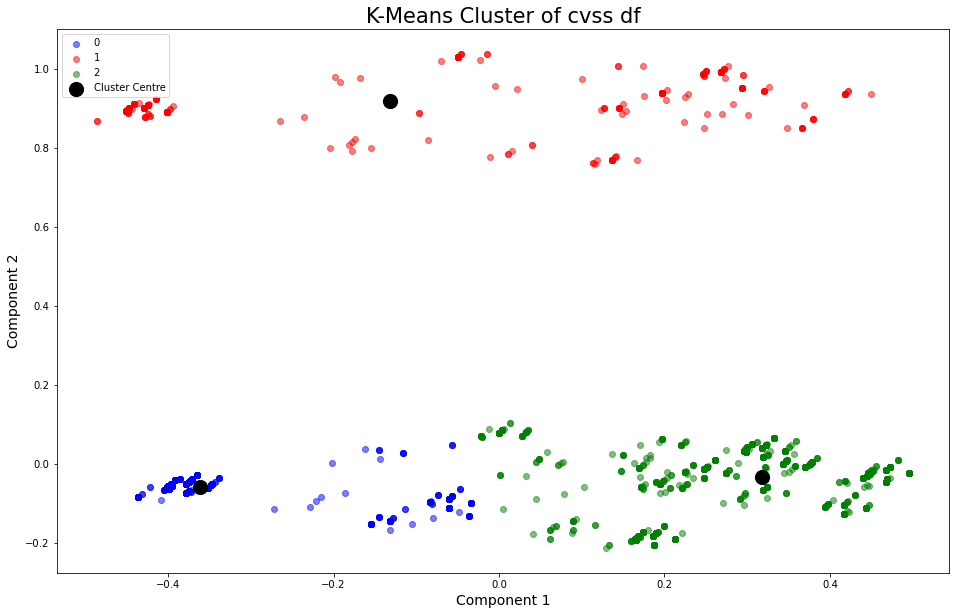

In [21]:
# YOUR CODE HERE
#Select relevant columns
standardscalar = StandardScaler() # resize the distribution of values
standardscalar.fit(cvss_df.iloc[:, 1:-2])#fit values
kmeans = standardscalar.transform(cvss_df.iloc[:, 1:-2])
reduced_kmeans = PCA(n_components=2).fit_transform(cvss_df.iloc[:, 1:-2]) #transforms data for cvss_df exluding coloumns
clusters = KMeans(n_clusters=3, random_state=1)#3 cluster and random state
clusters_model = clusters.fit(PCA(n_components=2).fit_transform(cvss_df.iloc[:, 1:-2]))#fit cluster

#Lab6 code. 
colour = ['blue','red','green']  #Colours of the clusters in the graph
plt.figure(figsize=(12,10)) #size of graph
cluster_max_label = np.max(clusters_model.labels_)+1  #Numpy max of cluster model labels + 1
alpha_value = 1/2
plt.figure(figsize=(16,10)) #Size of graph

#Plotting Points
i = 0
while i < cluster_max_label: #plotting points
    x = reduced_kmeans[clusters_model.labels_==i][:,0] # x axis
    y = reduced_kmeans[clusters_model.labels_==i][:,1] # y axis
    plt.scatter(x, y,label=i, c=colour[i], alpha=alpha_value)
    i = i + 1

x1 = clusters_model.cluster_centers_[:,0]
y1 = clusters_model.cluster_centers_[:,1]
plt.scatter(x1,y1,label='Cluster Centre', s=200, c='black')
plt.title("K-Means Cluster of cvss df",size=21)
plt.xlabel("Component 1", size=14) #Check what the princple components are
plt.ylabel("Component 2", size=14) # ^
plt.legend()
plt.show()
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 1.3 Analysing the Clusters
With your clustering model complete, analyse the outputs in preparation for showing the results to the procurement team. Your tasks are as follows:

#### 1.3.1 Comparison of summary statistics between clusters
1. Display and compare the mean of the CVSS Base Score, between all clusters in your model. 
2. Identify and explain the largest differences in metrics (including the mean of the CVSS Base Scores) between the clusters using a suitable summary statistic(s). (i.e. what are the defining characteristics of a cluster compared to other cluster(s)?)


In [22]:
# YOUR CODE HERE
clusters_df = [cvss_df[clusters_model.labels_==i] for i in range(clusters_model.n_clusters)] #finding cluster
stats_df = pd.DataFrame({  #plotting cluster values
    #Below is calculating all the means to be displayed for each cluster
    'cluster' : list(range(clusters_model.n_clusters)),
    'size' : [len(clusters_df[i]) for i in range(clusters_model.n_clusters)],
    'mean(v3_confidentialityImpact)' : [round(clusters_df[i]['v3_confidentialityImpact'].mean(), 2) for i in range(clusters_model.n_clusters)],
    'mean(v3_attackVector)' : [round(clusters_df[i]['v3_attackVector'].mean(), 2) for i in range(clusters_model.n_clusters)],
    'mean(v3_integrityImpact)' : [round(clusters_df[i]['v3_integrityImpact'].mean(), 2) for i in range(clusters_model.n_clusters)],
    'mean(v3_availabilityImpact)' : [round(clusters_df[i]['v3_availabilityImpact'].mean(), 2) for i in range(clusters_model.n_clusters)],
    'mean(v3_attackComplexity)' : [round(clusters_df[i]['v3_attackComplexity'].mean(), 2) for i in range(clusters_model.n_clusters)],
    'mean(v3_privilegesRequired)' : [round(clusters_df[i]['v3_privilegesRequired'].mean(), 2) for i in range(clusters_model.n_clusters)],
    'mean(v3_userInteraction)' : [round(clusters_df[i]['v3_userInteraction'].mean(), 2) for i in range(clusters_model.n_clusters)],
    'mean(v3_baseScore)' : [round(clusters_df[i]['v3_baseScore'].mean(), 2) for i in range(clusters_model.n_clusters)]})
stats_df
# (ANY ADDITIONAL CELLS AS REQUIRED)

,cluster,size,mean(v3_confidentialityImpact),mean(v3_attackVector),mean(v3_integrityImpact),mean(v3_availabilityImpact),mean(v3_attackComplexity),mean(v3_privilegesRequired),mean(v3_userInteraction),mean(v3_baseScore)
0,0,4028,0.55,0.75,0.54,0.56,0.0,0.76,0.79,8.72
1,1,426,0.44,0.78,0.38,0.35,1.0,0.75,0.80,6.63
2,2,4756,0.23,0.80,0.15,0.11,0.0,0.74,0.71,5.98


#### 1.3.2 Visual exploration of the distribution of Base Scores between clusters
(a) Visualise the distribution of the CVSS Base Score between each cluster. 


(b) Answer the following: Without the use of a hypothesis test, does the CVSS Base Score appear to differ significantly between these clusters? (You may reference the previous question (a) rather than reproducing answers)

<span style= 'float: right;'><b>[4 marks]</b></span>

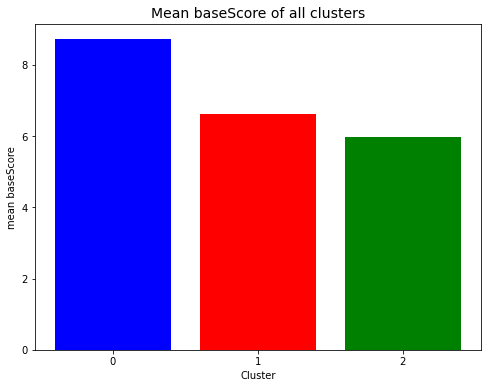

In [23]:
# YOUR CODE HERE
# Shows the mean distribution of values of baseScore
plt.figure(figsize=(8,6))
plt.bar(stats_df['cluster'], stats_df['mean(v3_baseScore)'], color=['blue','red','green'])
plt.title('Mean baseScore of all clusters', size=14)
plt.ylabel('mean baseScore', size=10)
plt.xlabel('Cluster', size=10)
plt.xticks([0,1,2])
plt.show()
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 1.4 Comparing our model prediction based on Base Severity values
Do the cluster labels accurately categorise the Base Severity? Since you know the actual Base Severity classification values for this dataset, can you now compare the model predictions with the actual Base Severity values?

<b>NOTE</b>: The number of unique Base Severity groups and the number of clusters in your trained model may be different.


In [24]:
# YOUR CODE HERE
highest_cluster_values = np.max(clusters_model.labels_)+1
i = 0
while i < highest_cluster_values:
    unique, number = np.unique(cvss_df[clusters_model.labels_==i]['v3_baseSeverity'], return_counts=True) #gets the unique points based on clusters and baseScores
    print('Cluster stats',i)
    print('-----------------------------')
    print (' ==> Stats :\n',np.asarray((unique, number)), '\n')  #returns the count
    i = i + 1
# (ANY ADDITIONAL CELLS AS REQUIRED)

Cluster stats 0
-----------------------------
 ==> Stats :
 [['CRITICAL' 'HIGH' 'MEDIUM']
 [1586 2276 166]] 

Cluster stats 1
-----------------------------
 ==> Stats :
 [['CRITICAL' 'HIGH' 'LOW' 'MEDIUM']
 [4 223 24 175]] 

Cluster stats 2
-----------------------------
 ==> Stats :
 [['CRITICAL' 'HIGH' 'LOW' 'MEDIUM']
 [42 971 124 3619]] 



# Self Project: Ransomware Classification using Machine Learning

## Q2: Unleashing k-Nearest Neighbors and Decision Trees for Ransomware Detection

In this self-initiated project, I delve into the intriguing realm of ransomware detection using a subset of the BitcoinHeist dataset. Inspired by the work of Akcora et al. (2019), I aim to develop classification models, specifically leveraging the power of k-nearest neighbors (KNN) and decision trees.

### Dataset Overview

The BitcoinHeist dataset is a rich source of information on Bitcoin transaction graphs, spanning from January 2009 to December 2018. It contains key features that play a crucial role in identifying ransomware payments, such as address, year, day, length, weight, count, looped, neighbors, income, and label.

| Column Name  | Description  |
| :----------- | :----------- |
| address      | Bitcoin address |
| year         | Year |
| day          | Day of the year |
| length       | Quantifies mixing rounds |
| weight       | Quantifies merge behavior |
| count        | Quantifies merging pattern |
| looped       | Counts transactions splitting, moving, and merging coins |
| neighbors    | Number of neighbors a transaction had |
| income       | Satoshi amount (1 bitcoin = 100 million satoshis) |
| label        | Ransomware family name or "white" (not known to be ransomware) |

### Project Objectives

1. **Model Training:**
   - Develop a k-Nearest Neighbors (KNN) classification model.
   - Train a Decision Trees classification model.
   
2. **Hyperparameter Experimentation:**
   - Conduct experiments on a range of hyperparameters for both models.
   - Utilize cross-validation to fine-tune model hyperparameters.

3. **Performance Comparison:**
   - Compare the performance of the k-Nearest Neighbors and Decision Trees models.
   - Evaluate the models on the same dataset using consistent train-test splits.

### Project Focus
This project provides an opportunity to explore the intricate world of ransomware detection using machine learning. By experimenting with KNN and Decision Trees, the aim is to contribute to the ongoing efforts in enhancing cybersecurity.

The reference to the work of Akcora et al. (2019) serves as a guiding foundation for this exploration.

### Experimentation and Learning
Embarking on this self-project allows for hands-on experimentation with classification models. The focus is not only on achieving accurate predictions but also on understanding the nuances of model hyperparameters and their impact on performance.

May the exploration into ransomware detection through machine learning unfold exciting insights!


### 2.1: Load and process the data
Your first task is to load and pre-process the data for the classifciation task. Remember that we are asking you to predict whether a given record is ransom (i.e., known to be ransomware).

The data to be loaded is found in `data/BitcoinHeistDataSample.csv`. 


In [26]:
# YOUR CODE HERE   CHANGE THE NAMES
bitcoin_csv = pd.read_csv('./data/BitcoinHeistDataSample.csv')
bitcoin_og = pd.read_csv('./data/BitcoinHeistDataSample.csv')
#drop all non needed coloumns
bitcoin_csv.drop(['day', 'year','address','neighbors'], axis=1, inplace=True)
#Label ransom or white
bitcoin_csv.loc[bitcoin_csv['label'] != 'white', 'label'] = 'ransom'
bitcoin_csv
# (ANY ADDITIONAL CELLS AS REQUIRED)

,length,weight,count,looped,income,label
0,38,0.166997,9,0,3.778000e+07,white
1,144,6.129424,1906,1889,3.291332e+10,ransom
2,0,1.000000,1,0,1.100000e+09,white
3,144,0.680399,853,771,2.130000e+09,ransom
4,144,0.012218,3880,0,4.213180e+07,white
...,...,...,...,...,...,...
9995,0,0.500000,1,0,2.056069e+08,ransom
9996,112,2.002083,13,0,8.940872e+08,ransom
9997,2,1.000000,1,0,7.870000e+08,white
9998,0,0.500000,1,0,6.560000e+08,white


### 2.2 Data Analysis and Visualisation
 
We are interested in looking at how the volume of **ransom** and **white** data points differ across the years in this sample dataset. Your task is to come up with a suitable plot to visualise this and comment on your observations.

**NOTE**: The dataset is a sub-set of the original dataset that is not representative of the real spread between the actual labels. Hence, the conclusions we can reach based on the above plot may not hold for the full dataset, which is out of scope for this question.


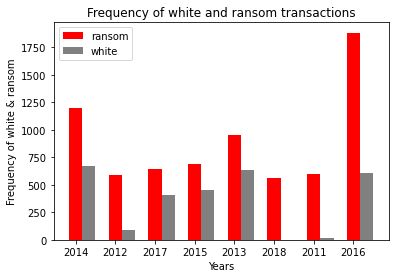

In [27]:
# YOUR CODE HERE
fig = plt.figure()
plot = fig.add_subplot(111)

years = list(bitcoin_og.year.unique())
colors = ['red','grey']

def add_to_graph(loop_i,loop_j):
    x = bitcoin_csv.loc[bitcoin_og['year']==loop_i].label.value_counts()[loop_j]
    plt.bar(bar_gap, x, width, color=colors[loop_j])

bar_gap = 1
width = 0.5
for i in years:
    for j in range(2):
        add_to_graph(i,j)
        bar_gap += width
    bar_gap += width

#Plot details
plt.xticks(width*2+np.arange(8)*width*3, years)
plot.set_xlabel("Years")
plot.set_ylabel("Frequency of white & ransom")
plot.set_title("Frequency of white and ransom transactions")
plot.legend(['ransom', 'white'], frameon=True, facecolor="white")
plt.show()
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 2.3: Classification using k-Nearest Neighbors
Train a KNN model using this dataset to predict whether a given record is ransom (i.e., known to be ransomware).
- How did you prepare the dataset for this task?
- How many neighbors k, did you use for your model? What are the values of the other hyperparameters of your model? 
- How did you decide on the hyper-parameters of your model? 
- Print the validation, training and testing scores for your model


In [28]:
# YOUR CODE HERE
columns_heading = ['length','weight','count', 'looped','income','label']

#ADAPTED FROM ASSIGNMENT 1

# #changing the data frame cvss_df to np array using coloumn names(Harrison, 2018)
columns = np.array(bitcoin_csv[columns_heading]) 

# Splitting data, training and testing 8:2 AS recomended(Harrison, 2018)
training_data, test_data = train_test_split(columns, train_size = 0.8, random_state=1) #Split 8
# Splitting data training and validation(Harrison, 2018)
training_data, valid_data = train_test_split(training_data, train_size=0.2, random_state=1) # Split 2

# Training Data(Harrison, 2018)
training_input = training_data[:,:-1] # All the training data to learn from
training_output = training_data[:,-1] # only the last column with results (baseSeverity)
valid_input = valid_data[:,:-1] # All the validation data to verify
valid_output = valid_data[:, -1]# All the validation results to compare to

# Testing Data
test_input  = training_data[:, :-1] #Slicing data everything but the last coloumn
test_output = training_data[:, -1] #Slicing data just the last coloumn (Harrison, 2018)
  
i = 1 #index for while loop also used to store best_k(Harrison, 2018)
best_k = -1 #Variable to store the best k value
best_k_score = -1 #Variable to store the best score
# for i in range(1, 100): Tested Optimal k value till 99 and found main area was 1-25
        
while i <= 25:
    knn = KNeighborsClassifier(n_neighbors=i) #Changing neighbor number(Harrison, 2018)
    learning_model = knn.fit(training_input, training_output) # scaled X encoded, un-scaled y encoded
    training_score = knn.score(training_input, training_output) #Training X , Y Score
    validation_score = knn.score(valid_input, valid_output) #Valid X , Y Score
    # finding the best k 
    if best_k <= validation_score: # finding optimal k
        best_k_score = validation_score
        best_model = learning_model
        best_k = i #update variable(Harrison, 2018)
    i = i+1
    
#defining k neighbor classifier
knn = KNeighborsClassifier(n_neighbors=1, p=2) # classification model neighbors = 1, euclidean_distance =2
#training the model
model = knn.fit(training_input, training_output) # training_input = all columns excluding the baseScores, training_output = baseScores
test_prediction = model.predict(test_input)
    
#performance metrics 
print("The best k value : " ,str(best_k))
print ("The best validation score is: ",str(best_k_score)) 
print("Training Score:" + str(knn.score(training_input, training_output)))
print("Testing Score: " + str(knn.score(test_input, test_output)))
print('accuracy: ', (sum(test_prediction == test_output)/ len(test_output)))# accuracy = sum(data when prediction matches the test output)/ number of test outputs 
print(mk.classification_report(test_output, knn.predict(test_input)))
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)(Harrison, 2018)```
# (ANY ADDITIONAL CELLS AS REQUIRED)

The best k value :  1
The best validation score is:  0.6053125
Training Score:0.98375
Testing Score: 0.98375
accuracy:  0.98375
              precision    recall  f1-score   support

      ransom       0.98      0.98      0.98       779
       white       0.99      0.98      0.98       821

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



### 2.4: Classification using Decision trees
Train a Decision Tree model using this dataset to predict whether a given record is ransom (i.e., known to be ransomware).
- How did you prepare the dataset for this task?
- What are the hyperparameters of your model?
- How did you decide on the hyperparameters for your model? 
- Visualise the decision tree that you trained (display the tree in the notebook, you may optionally save this as a figure; If you save the tree as a figure, you should include the figure in the `img` folder, and import it into a markdown box in your notebook. You can use the command `![tree.png](./img/tree.png)` where `tree.png` is the name of your figure.)
- Print the validation, training and testing scores for your model


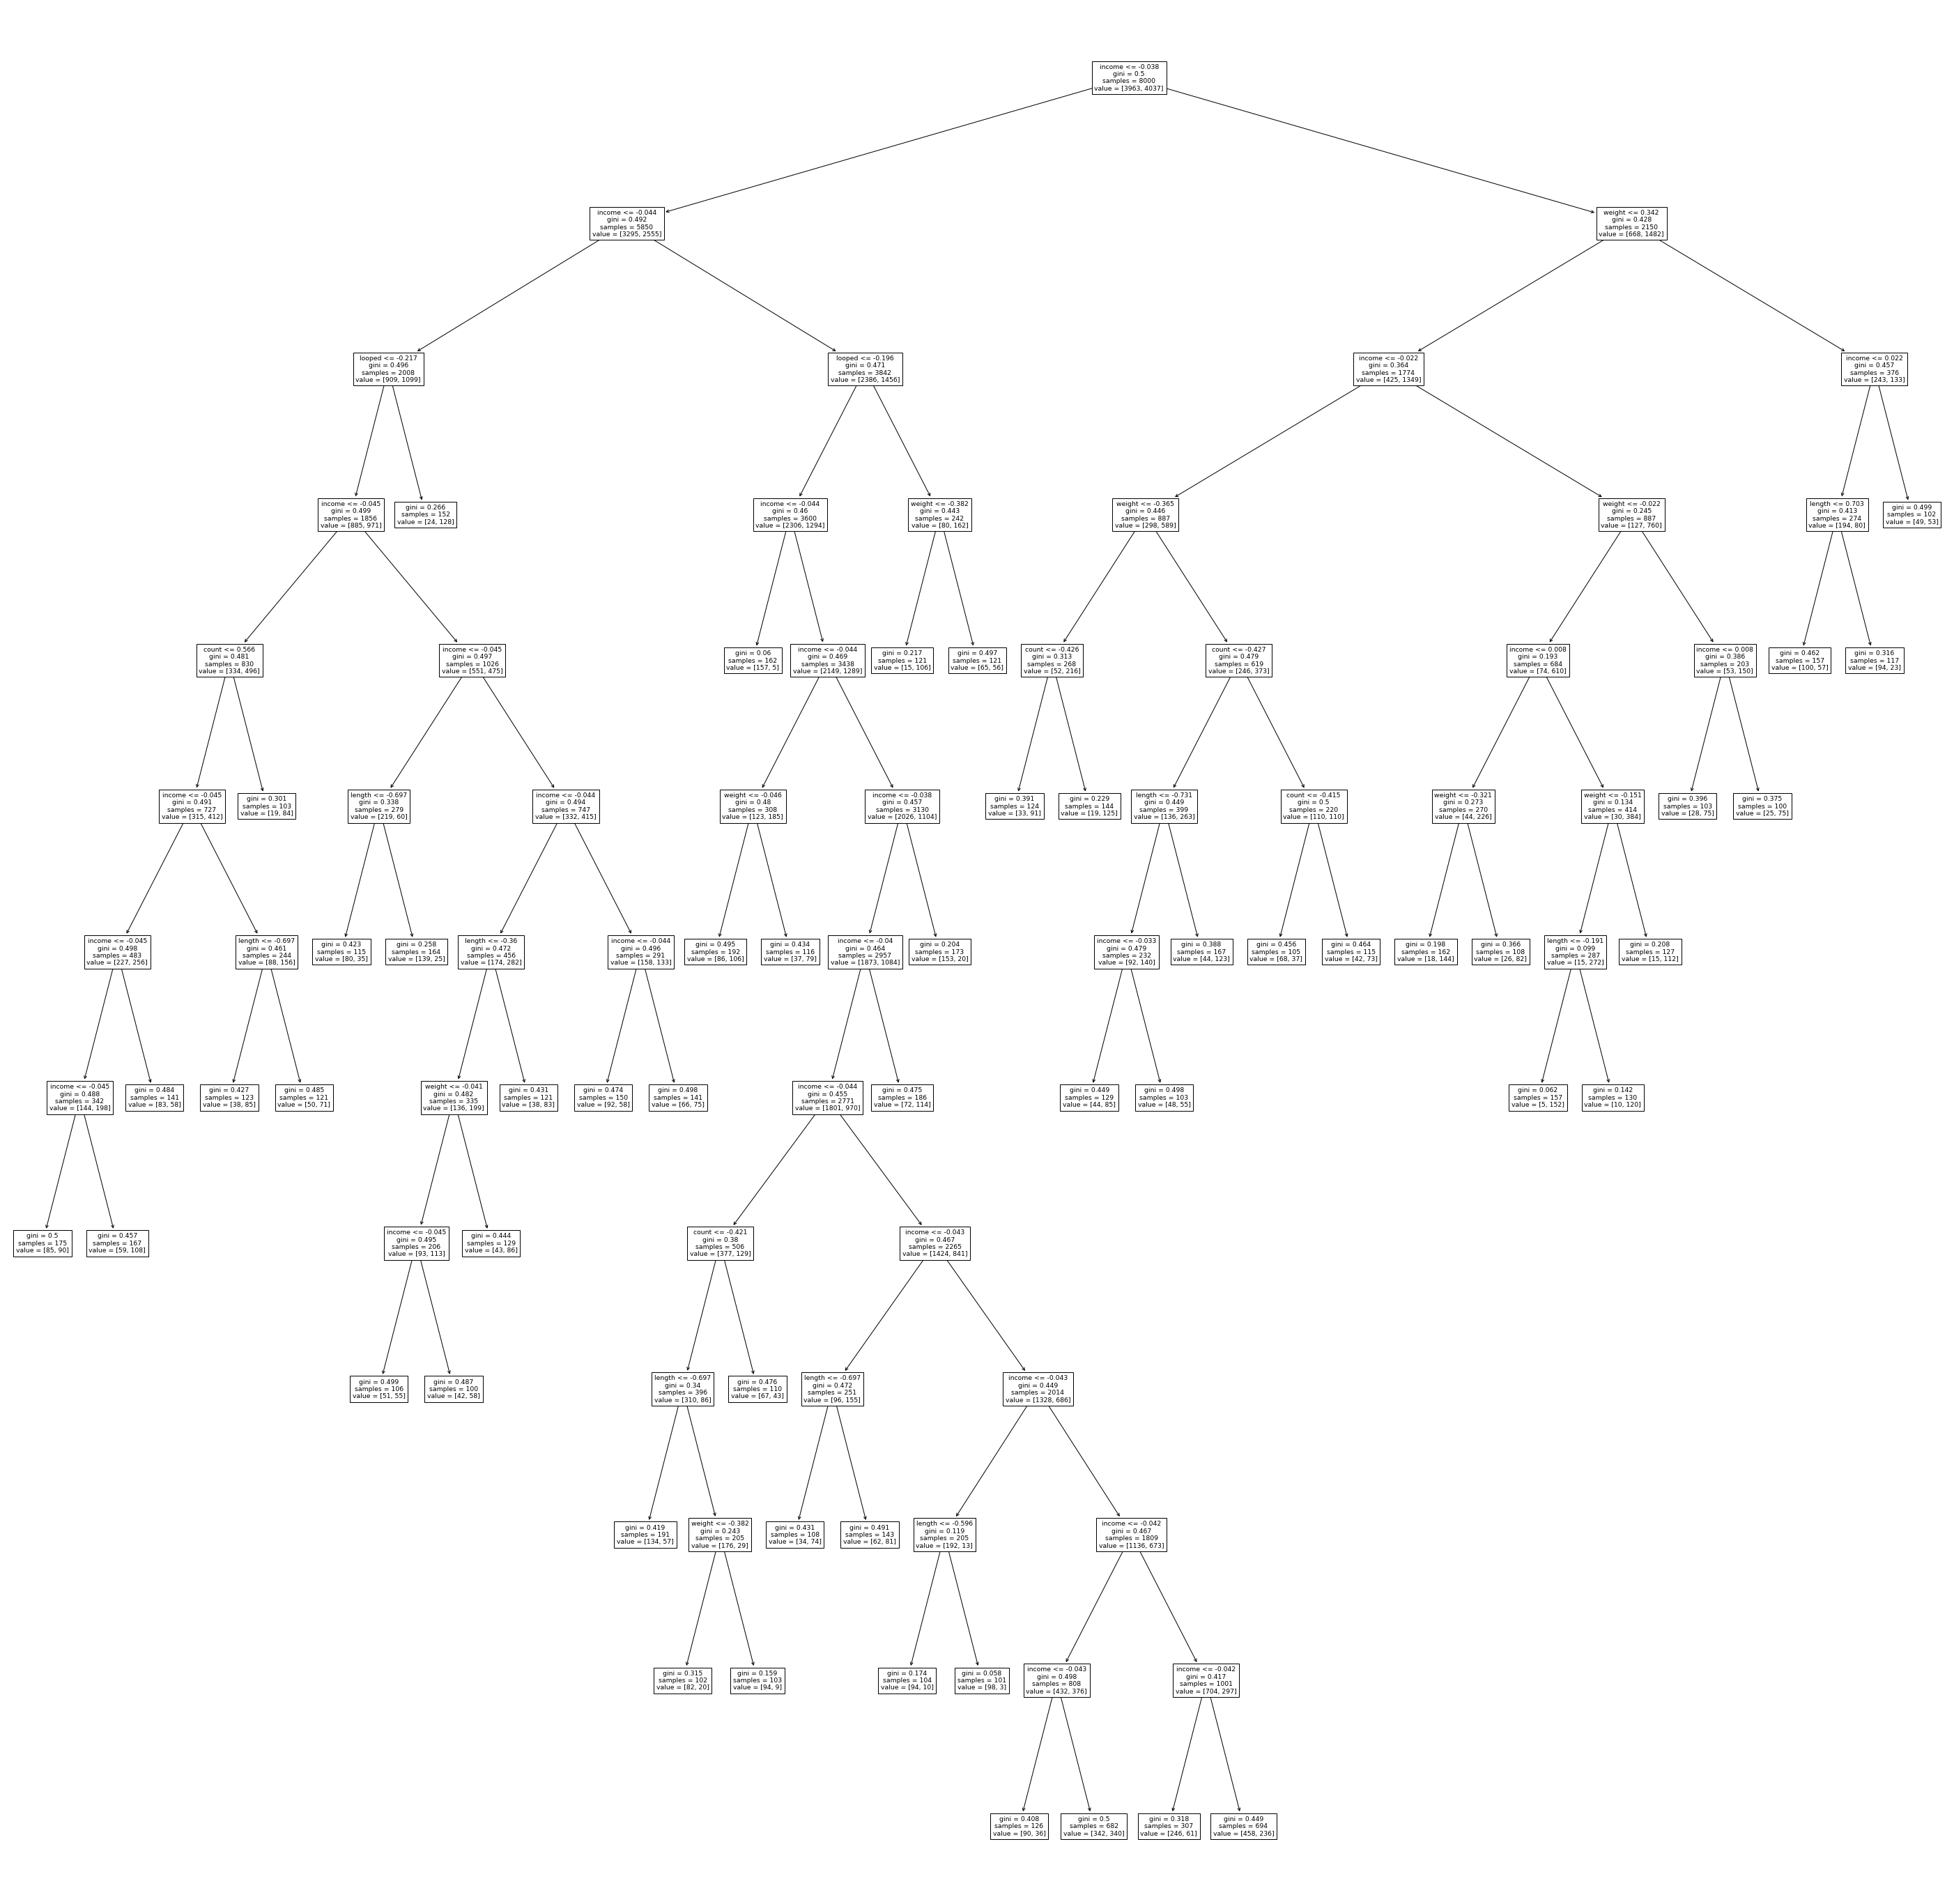

Training Score: 0.698 Testing Score:  0.6855
the 5 fold average cross validation score: 0.6472


In [29]:
# YOUR CODE HERE
label = LabelEncoder().fit_transform(bitcoin_csv['label'])
bitcoin_csv.loc[:,'label'] = label

# Splitting data, training and testing 8:2 AS recomended(Harrison, 2018)
training_x, testing_x, training_y, testing_y = train_test_split(bitcoin_csv.iloc[:,[0,1,2,3,4]], bitcoin_csv['label'],train_size =0.8, random_state = 1)


#fit and scale
trainx_scaled = StandardScaler().fit(training_x).transform(training_x)
testx_scaled = StandardScaler().fit(training_x).transform(testing_x)

#Decision tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_split=12, min_samples_leaf=100).fit(trainx_scaled, training_y)

plt.figure(figsize=(50,50))  # plot size
tree.plot_tree(dt_model, feature_names = training_x.columns)
plt.plot()
plt.savefig('tree.png',dpi=100)
plt.show()
print("Training Score:", dt_model.score(trainx_scaled, training_y), "Testing Score: ", dt_model.score(testx_scaled, testing_y))

#Validate results
scores = cross_validate(DecisionTreeClassifier(), trainx_scaled, training_y, cv=5 ,scoring='accuracy')
print(f"the 5 fold average cross validation score: {np.mean(scores['test_score']):.4f}")
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 2.5: Model comparision
Compare the performance of the two models that you trained in 2.3 and 2.4. 
- Include the Confusion Matrix, Accuracy, Precision, Recall and F1-scores in your comparision.
- Which model is better based on the metrics you obtained? 
- Discuss the performance of the two models in terms of the False Negatives and False Positives (assume that we consider False Negatives (incorrectly classifying a ransom record as white) are more harmful than False Positives (incorrectly classifying white record as ransom))


In [30]:
# YOUR CODE HERE
#performance metrics 2.3
print ("Metrics for Classifier Q2.3")
print("Training Score:" + str(knn.score(training_input, training_output)))
print("Testing Score: " + str(knn.score(test_input, test_output)))
print('accuracy: ', (sum(test_prediction == test_output)/ len(test_output)))# accuracy = sum(data when prediction matches the test output)/ number of test outputs 
print(mk.classification_report(test_output, knn.predict(test_input)))
print ("")
print ("Metrics for Classifier Q2.4")
#performance metrics 2.43
print("Training Score:", dt_model.score(trainx_scaled, training_y), "Testing Score: ", dt_model.score(testx_scaled, testing_y))
scores = cross_validate(DecisionTreeClassifier(), trainx_scaled, training_y, cv=5 ,scoring='accuracy')
print(f"the 5 fold average cross validation score: {np.mean(scores['test_score']):.4f}")


print(mk.classification_report(testing_y, dt_model.predict(testing_x)))
accuracy = accuracy_score(training_x,training_y)
report = classification_report(training_y, testing_y)
cm = confusion_matrix(testing_y, training_y)
print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)
#(ANY ADDITIONAL CELLS AS REQUIRED)

Metrics for Classifier Q2.3
Training Score:0.98375
Testing Score: 0.98375
accuracy:  0.98375
              precision    recall  f1-score   support

      ransom       0.98      0.98      0.98       779
       white       0.99      0.98      0.98       821

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


Metrics for Classifier Q2.4
Training Score: 0.698 Testing Score:  0.6855
the 5 fold average cross validation score: 0.6441
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1037
           1       0.48      1.00      0.65       963

    accuracy                           0.48      2000
   macro avg       0.24      0.50      0.33      2000
weighted avg       0.23      0.48      0.31      2000



C:\Users\P3mx4\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\P3mx4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\P3mx4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\P3mx4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

# Self Project: Database Developer Challenge

## Q3: Exploring the Sakila Database through SQL Mastery

Imagine the scenario: you're in the hot seat, applying for a coveted role as a database developer for an enigmatic wrestling company. To prove your SQL prowess, the interviewers have handed you an intriguing challenge: interact with an SQLite3 database using Python.

### Database Overview: Sakila
Before diving into the questions, let's familiarize ourselves with the Sakila database, a sample SQL database representing a DVD rental store. The schema includes tables like film, film_category, actor, customer, rental, payment, and inventory.

![Sakila ERD](./img/SQLite3_Sakila_Sample_Database_ERD.png)

### The Challenge
Your task is to answer a series of questions, each requiring a single SQL query to be executed. The questions aim to evaluate your SQL proficiency and understanding of the Sakila database.

### Questions Preview
1. Retrieve all films released in the year 2006.
2. Find the total number of rentals for each customer, sorted in descending order.
3. Identify the actors who have appeared in more than 20 films.
4. Calculate the average replacement cost of films per category.
5. Get the monthly revenue for each store.

### SQL Mastery Unleashed
This self-initiated project allows you to embark on a journey of SQL mastery. As you execute complex queries and unravel the intricacies of the Sakila database, you're not just showcasing your technical skills but also honing your ability to solve real-world challenges.

**Note**: While there might be slight discrepancies between the database model provided and the loaded database, the focus is on crafting precise SQL statements to derive meaningful insights.

May your SQL adventure unfold with finesse and mastery!


In [32]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one;
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

sakila_db = 'data/sqlite-sakila.db'
conn = create_connection(sakila_db) 
cur = conn.cursor()
# remember to close the connection when everything is done

Connection established!


### 3.1: Names of the tables
List the names of the tables found in this database.

In [ ]:
# YOUR CODE HERE
query = """SELECT name as 'Table Name' FROM sqlite_master WHERE type='table';""" # (Paul, 2022)
display(pd.read_sql_query(query, conn))

### 3.2: Number of Customers
List the number of customers in the database.


In [33]:
# YOUR CODE HERE
query = "SELECT COUNT(*) FROM customer;"
display(pd.read_sql_query(query, conn))

,COUNT(*)
0,599


### 3.3: Films with PG rating
What are the titles and descriptions of films with a PG rating?


In [13]:
# YOUR CODE HERE
query = "SELECT title,description,rating FROM film WHERE rating='PG';"
display(pd.read_sql_query(query, conn))

### 3.4: Films by category
What are the counts of films for each category in the database? Display the category names with the number of films in each category.


In [14]:
# YOUR CODE HERE
query = "SELECT name, COUNT(name) FROM category JOIN film_category ON category.category_id = film_category.category_id GROUP BY name;"
display(pd.read_sql_query(query, conn))

### 3.5: Most rented
Find the details of the top film in the database as measured by the most number of rentals.


In [15]:
# YOUR CODE HERE 
query = """SELECT film_id, title, description, release_year, rating, rental_amount FROM film NATURAL JOIN (SELECT film_id, SUM(amount) as 'rental_amount' FROM inventory NATURAL JOIN 
            (SELECT inventory_id, COUNT(rental_id) as 'amount' FROM rental GROUP BY inventory_id) GROUP BY film_id ORDER BY SUM(amount) DESC LIMIT 1);"""
display(pd.read_sql_query(query, conn))

### 3.6: Not returned rentals
Find out how many rentals have not yet been returned.


In [16]:
# YOUR CODE HERE
query = """SELECT COUNT(rental_id) as 'Non returned rentals' FROM rental WHERE return_date IS NULL;"""
display(pd.read_sql_query(query, conn))

### 3.7: Finding a customer
List the film titles that the customer _BARBARA JONES_ has rented. 


In [17]:
# YOUR CODE HERE 
query = """SELECT title AS 'Title' FROM film NATURAL JOIN (SELECT film_id FROM inventory NATURAL JOIN (SELECT inventory_id FROM rental WHERE customer_id in(SELECT customer_id FROM customer
                            WHERE LOWER(first_name) = 'barbara' AND LOWER(last_name) = 'jones')));"""  #(Resources, 2022)
display(pd.read_sql_query(query, conn))

# Relational Database Design Challenge

## Q4: Crafting a Database for Cybersecurity Insights

In this self-initiated challenge, I delve into the realm of database design, specifically tailored for the cybersecurity dataset encountered in Assignment 1 and Question 1 of this assignment. The focus is on normalizing the data and creating a robust relational database structure.

### Database Design Exploration

#### 4.1 Designing the CVSS Dataset Database

Considering the principles of normalization, I set out to design a relational database that aligns seamlessly with the CVSS dataset provided in the assignment. The dataset comprises three main tables:
- cvss_data_complete.csv
- cve_configurations_mapping.csv
- cwe_capec_mapping.csv

#### Assumptions

Before diving into the database design, let's establish a set of assumptions to guide the process:
- The dataset is accurate and comprehensive, covering all relevant aspects of cybersecurity vulnerabilities.
- Each table's primary key is well-defined and utilized for establishing relationships.
- The relationships between tables are crucial for maintaining data integrity.

#### ER Diagram

A clear and concise ER diagram serves as the visual representation of the designed database. This diagram illustrates the relationships between the three tables. For simplicity, the diagram has been drawn using the [draw.io](https://draw.io) tool.

![ER Diagram](./img/cvss_database_er.png)

### Crafting for Cybersecurity Excellence

This self-project goes beyond conventional assignments, allowing me to architect a database tailored to the unique nuances of cybersecurity data. As I traverse the complexities of normalization and relational structures, I'm not just creating a database; I'm constructing a foundation for cybersecurity insights.

May this database design stand resilient against the challenges of the cyber realm!


In [30]:
# YOUR CODE HERE
![er.png](/img/er.png)
# (ANY ADDITIONAL CELLS AS REQUIRED)

'[er.png]' is not recognized as an internal or external command,
operable program or batch file.


### 4.2 Evaluate the design of your database with respect to the normalisation considerations. 


### 4.3 Implement the database in an SQLite database 
Create the database with the tables you designed above. 


In [34]:
# YOUR CODE HERE

db_loc = "data/create_db.db"
conn = create_connection(db_loc)

def execute_sql(conn, sql):
    try:
        cur = conn.cursor()
        cur.execute(sql)
        print(f"Successfully executed command: \n {sql} \n")
    except Error as e:
        print(e)

query = '''CREATE TABLE contains (
            cve_id VARCHAR(15) NOT NULL,
            cwe_id VARCHAR(15) NOT NULL,
            PRIMARY KEY(cve_id, cwe_id)
            CONSTRAINT FK_cve FOREIGN KEY(cve_id) REFERENCES cvss_data(cve_id)
            CONSTRAINT FK_cwe FOREIGN KEY(cwe_id) REFERENCES cwe_capecs(cwe_id)
            );'''

execute_sql(conn, query)

query = '''CREATE TABLE cvss_df (
            cve_id VARCHAR(20) NOT NULL,
            assigner VARCHAR(1000),
            description VARCHAR(3000),
            ref_names VARCHAR(1000),
            ref_sources VARCHAR(1000),
            refs VARCHAR(1000),
            ref_tags VARCHAR(1000),
             v3_baseSeverity VARCHAR(12),
            v3_exploitabilityScore DECIMAL(1,1),
            v3_confidentialityImpact VARCHAR(12),
            v3_integrityImpact VARCHAR(12),
            v3_baseScore DECIMAL(1,1),
            v3_impactScore DECIMAL(1,1),
            v3_availabilityImpact VARCHAR(12),
            v3_attackVector VARCHAR(12),
            v3_attackComplexity VARCHAR(12),
            v3_privilegesRequired VARCHAR(12),
            v3_userInteraction VARCHAR(12),
            v3_scope VARCHAR(12),
            PRIMARY KEY(cve_id));'''

execute_sql(conn, query)

query = '''CREATE TABLE cve_config (
            cve_id VARCHAR(20) NOT NULL,
            vendor VARCHAR(150),
            product_name VARCHAR(150),
            version VARCHAR(150),
            PRIMARY KEY(cve_id, vendor, product_name)
            CONSTRAINT FK_cve FOREIGN KEY(cve_id) REFERENCES cvss_data(cve_id)
            );'''

execute_sql(conn, query)

query = '''CREATE TABLE cwe_capecs (
            cwe_id VARCHAR(15) NOT NULL,
            capecs VARCHAR(500),
            PRIMARY KEY(cwe_id));'''

execute_sql(conn, query)
conn.close()
# (ANY ADDITIONAL CELLS AS REQUIRED)

Connection established!
Successfully executed command: 
 CREATE TABLE contains (
            cve_id VARCHAR(15) NOT NULL,
            cwe_id VARCHAR(15) NOT NULL,
            PRIMARY KEY(cve_id, cwe_id)
            CONSTRAINT FK_cve FOREIGN KEY(cve_id) REFERENCES cvss_data(cve_id)
            CONSTRAINT FK_cwe FOREIGN KEY(cwe_id) REFERENCES cwe_capecs(cwe_id)
            ); 

Successfully executed command: 
 CREATE TABLE cvss_df (
            cve_id VARCHAR(20) NOT NULL,
            assigner VARCHAR(1000),
            description VARCHAR(3000),
            ref_names VARCHAR(1000),
            ref_sources VARCHAR(1000),
            refs VARCHAR(1000),
            ref_tags VARCHAR(1000),
             v3_baseSeverity VARCHAR(12),
            v3_exploitabilityScore DECIMAL(1,1),
            v3_confidentialityImpact VARCHAR(12),
            v3_integrityImpact VARCHAR(12),
            v3_baseScore DECIMAL(1,1),
            v3_impactScore DECIMAL(1,1),
            v3_availabilityImpact VARCHA

# Exploring Data Ethics and Security in Social Media

## Q5: Reflecting on the Facebook Emotional Contagion Experiment

In this self-initiated exploration, I delve into the realm of data ethics and security, focusing on a notable incident involving Facebook's Emotional Contagion Experiment.

### Background

Facebook, being the most widely used social media platform, holds immense influence over users' interactions through its news feed algorithms. In January 2012, a group of data scientists from Facebook and Cornell University conducted an experiment manipulating users' news feeds, exploring the impact of emotional contagion without user awareness.

### Legal Considerations

The experiment raises ethical and legal questions. Facebook's terms of service mention users relinquishing data for research. However, the experiment involved active manipulation of user experience without explicit consent. The legal standing becomes complex, relying on the interpretation of terms of service.

### Company Perspective

As a company executive at Facebook, assessing the experiment's ethical stance is crucial.

#### 5.1: Was this experiment a good thing?

From a company perspective, the experiment can be viewed differently:

**Positive Aspects:**
- **Research for Service Improvement:** Facebook emphasizes the research's aim to enhance services and make content more relevant and engaging.
- **Understanding User Response:** Assessing emotional contagion aids in understanding user response to different content types.

**Concerns and Ethical Considerations:**
- **Informed Consent:** The lack of explicit consent raises ethical concerns, especially when manipulating users' emotions.
- **Transparency:** Full transparency about research initiatives is vital for maintaining user trust.
- **Data Security:** The storage of data securely is reassuring, but ethical considerations extend beyond mere data security.

**Conclusion:**
The experiment, while contributing to research insights, lacks transparency and raises concerns about user consent. Balancing service improvement with ethical considerations becomes paramount.

### Reflecting on Ethics and Security

This self-project not only scrutinizes a significant data ethics incident but also prompts a broader exploration of ethical considerations and security practices in the realm of social media.

May this reflection foster a deeper understanding of the intersection between technology, ethics, and user trust.


### 5.2: User perspective 
As a Facebook user, do you think this experiment was a good thing? Discuss your reasons.



### 5.3: Was the research ethical? 
Discuss both the legal and ethical aspects of the research.  (What ethical considerations should the data scientists have taken into account?  Given the legal terms specified, was the experiment reasonable and justified? Make sure to substantiate your presented arguments.)


### 5.4: Responsibilties of data scientists

What ethical responsibilities do data scientists have when carrying out their job? Why are those ethical responsibilities important?  Discuss in relation to the facebook experiment described.


### 5.5: Data Security
Reading about this experiment has now made you think about your data on Facebook.  You are now wondering not only about what the good folks at Facebook could be doing to manipulate your news feed, but also about preserving the security of your data and the various vulnerabilities that could be exploited to access and misuse your data.  

For the following activities, please assess the security risk and reflect on possible consequences:

**5.5.1: Your friends send you a lot of facebook quizzes (such as "Which Superhero are you?" or "Which Disney Princess are you?"**

If any, what are the security risks involved in posting your answers to those quizzes and how can you mitigate against them?


**5.5.2: This good-looking person sent you a friend's request, and you feel conflicted about whether to accept or reject it.**

If any, what are the security risks involved in accepting this request and what could be possible consequences?


### 5.6: Getting under the hood with data privacy and security
You bought something from that quirky clothing store and now suddenly you are noticing their ads on Facebook.  You did sign up for their loyalty program, who would say no to 5% off! So, did they share your contact information with Facebook? How does Facebook know you like that particular store when you have not posted about going there? (you did not want your Mum to find out you bought those clothes yet.)  It turns out that businesses can target customers already on their list through Facebook but your contact details are not directly shared.  To ensure your privacy, Facebook hashes the list of contacts that a particular business uploads for advertising before it gets used.  Facebook hashes contact information it already has of its own users before comparing with the hashed list from the business to see if there is a match.  (https://www.facebook.com/help/597339877966751)

**5.6.1: Hashing**
<br>Suppose your email address is punk_rocker@email.com  
[This article](https://3qdigital.com/wp-content/uploads/2016/06/facebook_audiences_data_security_overview.pdf ) suggests that Facebook uses the SHA-256 hashing algorithm. What would the hashed fingerprint of your email address be?  



In [ ]:
# YOUR CODE HERE
hash_email = 'punk_rocker@email.com'
sha_hash = sha256(hash_email.encode("UTF-8")).hexdigest()
sha_hash 


**5.6.2: Reflection**
<br>Reflect on how it makes you feel about getting targeted in this manner by a business you gave your details to?
You can consider human, ethics, privacy and security aspects (but you are welcome to raise additional points) in your reflection.
